# Support Vector Machine

Support Vector Machines (SVM) is een krachtig *supervised learning* algoritme, dat wordt gebruikt voor *classificatie* of voor *regressie*.

SVM's zijn een *discriminerende* classificatie: ze trekken een grens (*boundary*) tussen clusters van gegevens.

SVM wordt gebruikt voor classificatie en regressie. In deze notebook zijn twee secties met voorbeelden en oefeningen:
1. SVM voor classificatie
2. SVM voor regressie.

#### Wat ga je doen?
Doorloop en voeruit (*Run* of *Shift+Enter*) de Python voorbeelden en doe de opdrachten. Kijk niet te snel naar de VOORBEELDOPLOSSINGEN maar probeer het eerst zelf, of met je teamgenoten, het op te lossen.

#### Vervolg
Wanneer je de casus gaat uitwerken en je maakt gebruik van Support Vector Machine (classificatie of regressie) doe dan je voordeel met deze werkcollege voorbeelden en oefeningen.

#### Referenties
1. Voorbeelden van de classificatie algorithmen zijn een bewerking van de __[scikit-learn tutorial](https://github.com/jakevdp/sklearn_tutorial)__ van Jack Vanderplas.

2. Meer weten over `scikit-learn`:__[Scikit-learn
Machine Learning in Python](https://scikit-learn.org/stable/)__

---

In [1]:
# helper functions

%matplotlib inline

import sys
import os
from pathlib import Path
from packaging import version
import matplotlib.pyplot as plt
import pandas as pd

# Excel CSV-file
def load_csv_pd_data(path, filename, 
                     names=None, 
                     delim_whitespace=False
                    ):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV file `filename`,
           stored in a folder `path`.
           @names: header-names of columns
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(csv_path)
    return pd.read_csv(csv_path,
                       delim_whitespace=delim_whitespace,
                       names=names
                      )

# Excel XLS-file
def load_xls_pd_data(path, filename, 
                     names=None
                    ):
    '''
    load_xls_pd_data() - construct a pandas DataFrame object 
           from data in a Excel xls-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    xls_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_excel(xls_path,
                         names=names
                        )

# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "training_svm_regression_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, 
                format=fig_extension, 
                dpi=resolution
    )


---
## SVM voor classificatie

Een eenvoudig voorbeeld van SVM classificatie is het volgende voorbeeld op basis van kunstmatige gegevens.

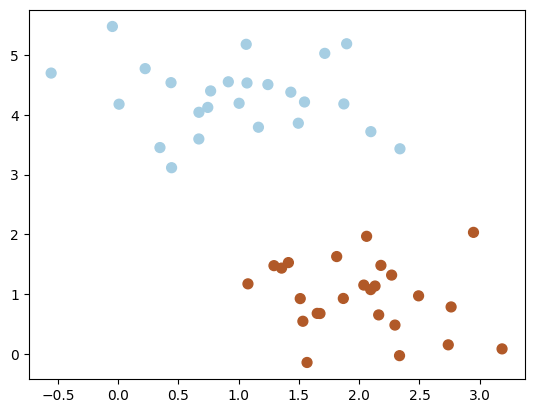

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=50, centers=2,
    random_state=0, cluster_std=0.60
)
plt.scatter(
    X[:, 0], X[:, 1], 
    c=y, s=50, cmap=plt.cm.Paired)


Een discriminerende classifier probeert een lijn te trekken tussen twee sets gegevens. Meteen zien we een probleem: zo'n regel is slecht te plaatsen!

Bijvoorbeeld, in het volgende voorbeeld zien we verschillende mogelijkheden die perfect discrimineren tussen de twee sets gegevens:

(-1.0, 3.5)

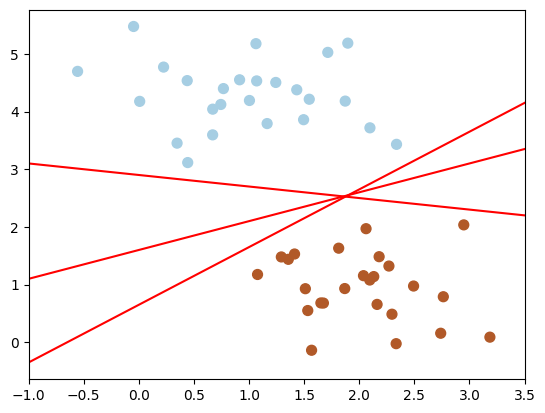

In [3]:
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(
    X[:, 0], X[:, 1],
    c=y, s=50, cmap=plt.cm.Paired
)

for m, b in [(1,0.65), (0.5,1.6), (-0.2,2.9)]:
    plt.plot(xfit, m*xfit+b, '-r')

plt.xlim(-1, 3.5)

Er zijn drie zeer verschillende separatoren die perfect onderscheid maken tussen deze sets gegevens. Afhankelijk van wat je kiest, wordt een nieuw gegevenspunt geheel anders geclassificeerd.

De vraag is: hoe kunnen we dit verbeteren?

### Het maximaliseren van de marge
SVM is een manier om dit aan te pakken. Wat SVM doet, is niet alleen een lijn tekenen, maar beschouwt ook een **gebied** (*region*) rond de lijn van een bepaalde breedte. Hier is een voorbeeld van hoe het eruit zou kunnen zien.

(-1.0, 3.5)

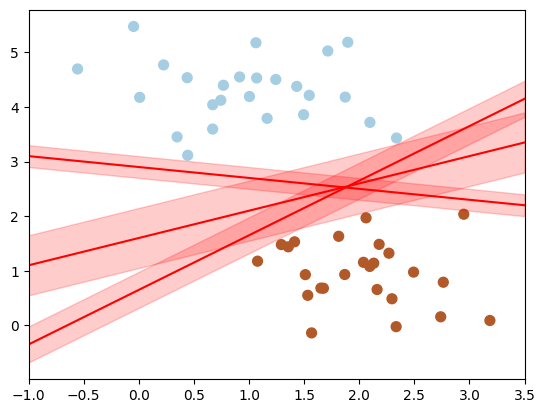

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(
    X[:, 0], X[:, 1],
    c=y, s=50, cmap=plt.cm.Paired
)

for m, b, d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-r')
    plt.fill_between(xfit, yfit-d, yfit+d,
                     edgecolor='none', color='r', 
                     alpha=0.2
                    )

plt.xlim(-1, 3.5)

Merk hier op dat als we deze breedte willen maximaliseren, de middelste lijn duidelijk de beste is.

Dit is de intuïtie van SVM, die een lineair discriminantmodel optimaliseert in combinatie met een **marge** (*margin*) die de loodrechte afstand tussen de datasets vertegenwoordigt.

Nu gaan we een SVM-classificatie op deze punten toepassen. Hoewel de wiskundige details van het waarschijnlijkheidsmodel (*likelihood model*) interessant zijn, laten we je daarover elders lezen. In plaats daarvan behandelen we het scikit-learn algoritme als een zwarte doos die de bovenstaande taak volbrengt.

In [5]:
# helper function which plot SVM decision boundaries

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_functio

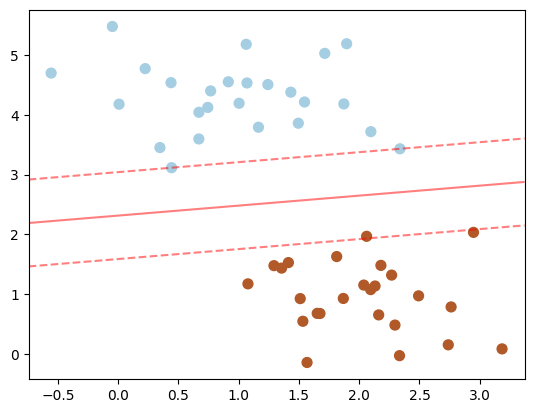

In [6]:
# Support Vector Classifier
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

# visualizing SVM classier
plt.scatter(X[:, 0], X[:, 1],
            c=y, s=50, cmap=plt.cm.Paired)

# visualize the SVM boundaries
plot_svc_decision_function(clf)

Het is je misschien opgevallen dat de stippellijnen een aantal punten raken: deze punten zijn de cruciale onderdelen van deze fit, en staan bekend als de *support vectors* (waaraan het algoritme zijn naam dankt).

In scikit-learn zijn deze vectoren opgeslagen in de attribuut `support_vectors_` van de classifier. In volgende voorbeeld gemarkeerd in kleur rood,

C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_functio

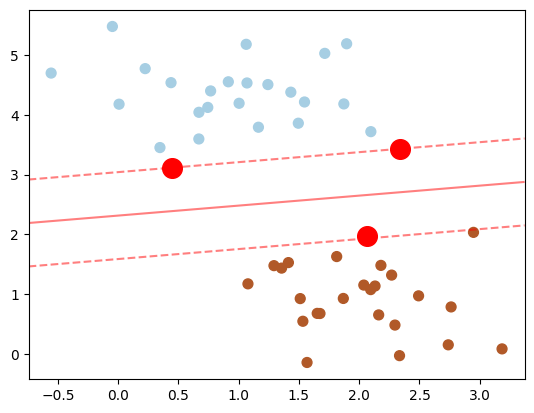

In [7]:
# datasets
plt.scatter(X[:, 0], X[:, 1],
            c=y, s=50, cmap=plt.cm.Paired
           )
# decision boundaries
plot_svc_decision_function(clf)

# support vectors
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=200, facecolors='red'
           )

Het unieke van SVM is dat alleen de **support vectors** (Ned: ondersteuningsvectoren) ertoe doen: dat wil zeggen, als je een van de andere punten zou verplaatsen zonder dat ze de *decision boundaries* overschrijden, zouden ze geen effect hebben op de classificatieresultaten!

### Kernel methods

Waar SVM ongelooflijk intrigerend wordt, is wanneer het wordt gebruikt in combinatie met **kernels**.

Laten we eens kijken naar enkele gegevens die niet lineair te scheiden zijn:

C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_functio

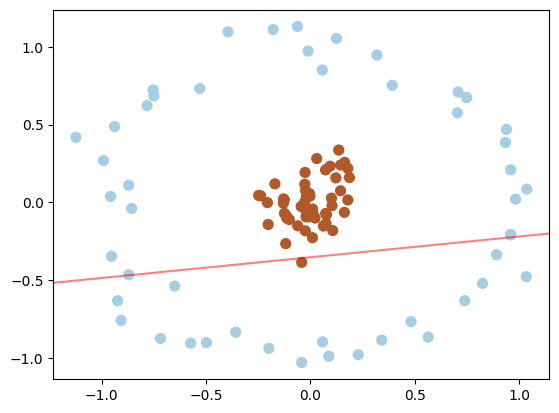

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:, 0], X[:, 1],
            c=y, s=50,
            cmap=plt.cm.Paired
           )

plot_svc_decision_function(clf)

Het is duidelijk dat geen enkele lineaire discriminatie deze gegevens ooit zal scheiden. 

Een manier waarop we dit kunnen aanpassen, is een **kernel** toe te passen. De **kernel** is een functionele transformatie van de invoergegevens.

Bijvoorbeeld, en eenvoudig model dat we zouden kunnen gebruiken is een *radial basis* functie.

In [9]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

als we dit langs onze gegevens plotten, kunnen we het effect erop zien:

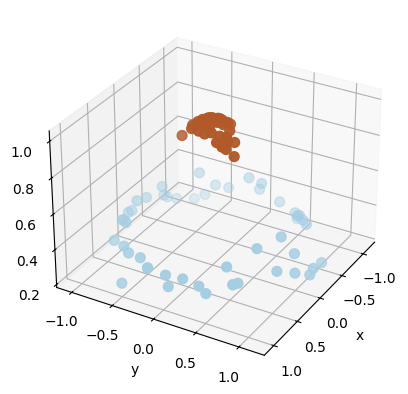

In [10]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r,
             c=y, s=50,
             cmap=plt.cm.Paired
            )

ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

We kunnen zien dat met deze extra dimensie het triviaal is de gegevens lineair te scheiden!

SVM heeft een meer geavanceerde versie van deze kernel ingebouwd in het proces. Dit wordt bereikt door `kernel='rbf'` te gebruiken, *'rbf'* is een afkorting voor *radial basis function*.

C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_function([[xi, yj]])
C:\Users\hq0132410\AppData\Local\Temp\ipykernel_10104\104903862.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i, j] = clf.decision_functio

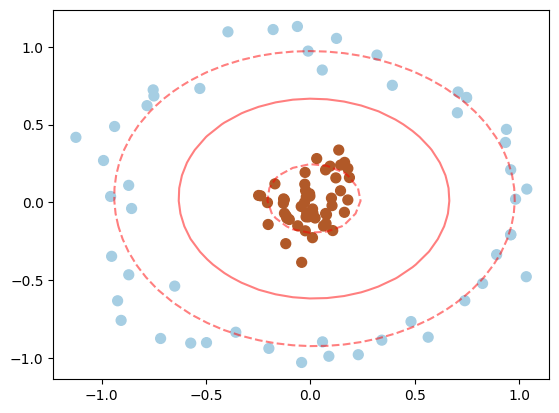

In [11]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X,y)

# datasets
plt.scatter(X[:, 0], X[:, 1],
            c=y, s=50,
            cmap=plt.cm.Paired
           )
# decision boundaries
plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=200, facecolors='none'
           )            

Hier zijn er effectief *N* basisfuncties: één gecentreerd op elk punt.

NB. Door een slimme wiskundige truc verloopt deze berekening zeer efficiënt met behulp van de "Kernel Trick", zonder daadwerkelijk de matrix van kernelevaluaties te construeren. Dit valt verder buiten de scope van de module.

---